In [60]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [61]:
url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"
df = pd.read_csv(url)
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [62]:
df.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')

In [63]:
#Preprocess the Data (medv is the price)
X = df.drop('medv', axis=1)
y = df['medv']

In [64]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [65]:
#Build Deep Neural Network for Linear Regression
model = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(x_train.shape[1],)),
    layers.Dense(1)  # Single output neuron for regression
])
model.summary()

C:\Users\prati\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                     │ (None, 64)                  │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 961 (3.75 KB)

 Trainable params: 961 (3.75 KB)

 Non-trainable params: 0 (0.00 B)

In [66]:
# Use Mean Squared Error loss for regression
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [67]:
# Train the model with training data
history = model.fit(x_train, y_train, epochs=10, validation_split=0.2, verbose=1)

Epoch 1/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 592.1113 - mae: 22.9033 - val_loss: 556.8095 - val_mae: 22.1796
Epoch 2/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 614.6921 - mae: 22.9105 - val_loss: 541.4988 - val_mae: 21.8498
Epoch 3/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 597.0364 - mae: 22.5578 - val_loss: 526.0097 - val_mae: 21.5121
Epoch 4/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 579.9313 - mae: 22.4381 - val_loss: 509.7732 - val_mae: 21.1583
Epoch 5/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 531.3356 - mae: 21.4860 - val_loss: 492.5980 - val_mae: 20.7807
Epoch 6/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 562.5239 - mae: 21.7927 - val_loss: 474.4763 - val_mae: 20.3709
Epoch 7/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 534.1356 - mae: 21.1317 - val_loss: 455.5277 - val_mae: 19.9329
Epoch 8/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 479.8087 - mae: 20.1853 - val_loss: 435.2519 - val_mae: 19.4473
Epoch 9/10
11/11

In [68]:
#Evaluate model on the test data
loss, mae = model.evaluate(x_test, y_test, verbose=1)
print("Mean Squared Error (Loss) on Test Set:", loss)
print("Mean Absolute Error (MAE) on Test Set:", mae)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 354.8123 - mae: 17.7107
Mean Squared Error (Loss) on Test Set: 362.41680908203125
Mean Absolute Error (MAE) on Test Set: 17.733421325683594


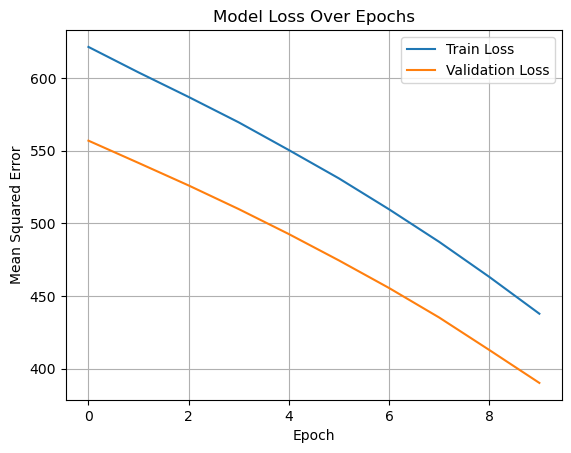

In [69]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.grid(True)
plt.show()